In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans

In [78]:
df = pd.read_csv(f"../datasets/normalized/unsupervised_learning/ul_player_final.csv")


In [79]:
df['season'].value_counts()

season
2022/2023    331
2021/2022    214
2020/2021    174
2019/2020    143
2018/2019    116
2017/2018     86
2016/2017     71
2015/2016     57
2014/2015     42
2013/2014     29
2012/2013     21
2011/2012     14
2010/2011     13
2009/2010     11
Name: count, dtype: int64

In [80]:
# It shows that we have different number of player's data in each season.
# This is because that we extracted the player's information from team's site
# where they don't provide the player's stats from the previous teams. 
# To improve the quality of data, more sources of data should be investgated in the following research. 
# But, in football, many players go through hard time when they move to other team.
# So, I decide to use player's stats only from current team. 
# Also, recent form is very important in sports world, I only use recent 3 years of data

df = df[df['season'].isin(['2022/2023', '2021/2022', '2020/2021'])]
df


,player_id,season,apps,mins,goals,yels,reds,shoots_per_game,pass_success,overall_ratings,...,rating_1,rating_2,rating_3,rating_4,rating_5,rating_6,rating_7,rating_8,rating_9,rating_10
0,367185,2022/2023,36(1),3135,13,6,0,2.3,80.9,7.37,...,8.66,6.27,7.38,6.06,9.22,6.01,7.48,7.14,6.95,6.45
1,367185,2021/2022,36(2),2996,11,6,0,2.6,79.5,7.06,...,8.66,6.27,7.38,6.06,9.22,6.01,7.48,7.14,6.95,6.45
2,367185,2020/2021,30(2),2562,5,1,0,1.9,81.8,6.88,...,8.66,6.27,7.38,6.06,9.22,6.01,7.48,7.14,6.95,6.45
5,279379,2022/2023,23(2),1985,10,6,0,3.0,80.9,7.35,...,6.04,8.90,7.63,7.45,7.21,6.07,7.53,6.97,6.38,6.56
6,279379,2021/2022,21(7),1880,8,1,0,2.3,84.8,7.19,...,6.04,8.90,7.63,7.45,7.21,6.07,7.53,6.97,6.38,6.56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1314,94868,2022/2023,9(4),772,1,3,0,1.5,76.8,6.38,...,6.62,7.75,5.99,6.24,6.18,6.04,6.05,6.57,6.26,6.42
1315,262854,2022/2023,11(15),1063,3,1,0,0.7,78.1,6.34,...,6.31,6.78,6.21,6.87,6.29,7.10,6.34,6.07,6.21,7.24
1316,262854,2021/2022,20(10),1822,5,2,0,0.9,81.0,6.52,...,6.31,6.78,6.21,6.87,6.29,7.10,6.34,6.07,6.21,7.24
1317,24248,2022/2023,16(7),1248,1,5,1,1.2,73.5,6.24,...,6.16,6.16,6.17,7.97,6.04,6.78,5.68,6.29,5.99,6.08


<Axes: ylabel='Frequency'>

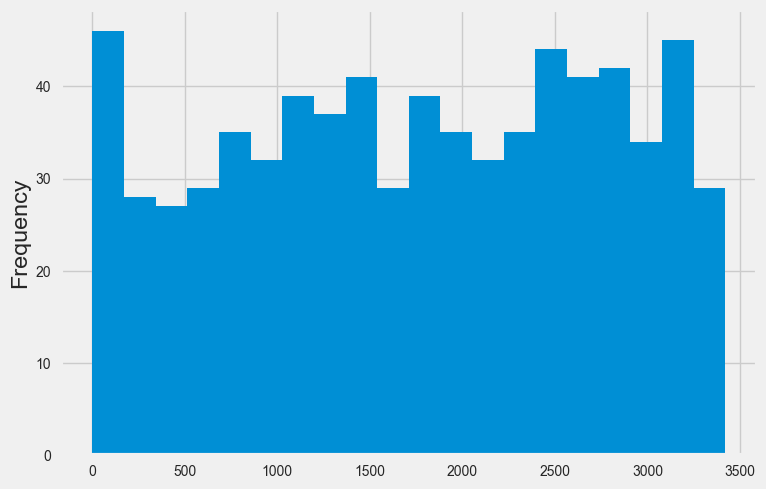

In [81]:
df['mins'].plot(kind='hist', bins=20)

In [82]:
# It does not seem to have a statistical meaning in the data item if a player appears under 300 mins.
# So I will filter the datasets with 300+ mins
df = df[df['mins'] > 300] 
df

,player_id,season,apps,mins,goals,yels,reds,shoots_per_game,pass_success,overall_ratings,...,rating_1,rating_2,rating_3,rating_4,rating_5,rating_6,rating_7,rating_8,rating_9,rating_10
0,367185,2022/2023,36(1),3135,13,6,0,2.3,80.9,7.37,...,8.66,6.27,7.38,6.06,9.22,6.01,7.48,7.14,6.95,6.45
1,367185,2021/2022,36(2),2996,11,6,0,2.6,79.5,7.06,...,8.66,6.27,7.38,6.06,9.22,6.01,7.48,7.14,6.95,6.45
2,367185,2020/2021,30(2),2562,5,1,0,1.9,81.8,6.88,...,8.66,6.27,7.38,6.06,9.22,6.01,7.48,7.14,6.95,6.45
5,279379,2022/2023,23(2),1985,10,6,0,3.0,80.9,7.35,...,6.04,8.90,7.63,7.45,7.21,6.07,7.53,6.97,6.38,6.56
6,279379,2021/2022,21(7),1880,8,1,0,2.3,84.8,7.19,...,6.04,8.90,7.63,7.45,7.21,6.07,7.53,6.97,6.38,6.56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1312,337916,2020/2021,30(1),2559,5,4,0,2.0,88.4,7.11,...,6.43,6.07,6.73,6.12,5.98,6.24,6.42,6.12,6.76,5.98
1314,94868,2022/2023,9(4),772,1,3,0,1.5,76.8,6.38,...,6.62,7.75,5.99,6.24,6.18,6.04,6.05,6.57,6.26,6.42
1315,262854,2022/2023,11(15),1063,3,1,0,0.7,78.1,6.34,...,6.31,6.78,6.21,6.87,6.29,7.10,6.34,6.07,6.21,7.24
1316,262854,2021/2022,20(10),1822,5,2,0,0.9,81.0,6.52,...,6.31,6.78,6.21,6.87,6.29,7.10,6.34,6.07,6.21,7.24


In [83]:
# To check the number of unique player_id and player_name
print(len(pd.unique(df['player_id'])))
print(len(pd.unique(df['Name'])))

 

284
284


In [ ]:
# There is no players with same name.

In [84]:
# add new column for recent form
ratings = ['rating_1','rating_2','rating_3','rating_4','rating_5','rating_6','rating_7','rating_8','rating_9','rating_10']

df["avg_rating_10_games"] = df[ratings].mean(axis=1)


/var/folders/np/f11s751j4dj_y_1cj4yxydpwpsr474/T/ipykernel_94178/3669098030.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["avg_rating_10_games"] = df[ratings].mean(axis=1)


In [85]:
# to get the goals per 90 mins since if a player appeares more games, it is likely to get a change to make more goals. So if we just use goals as a feature, it can be biased.

df["goals_per_90min"] = (df["goals"]*90)/df["mins"]

/var/folders/np/f11s751j4dj_y_1cj4yxydpwpsr474/T/ipykernel_94178/1204444864.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["goals_per_90min"] = (df["goals"]*90)/df["mins"]


In [86]:
# add new column - age
from datetime import datetime, date
def age(born):
    born = datetime.strptime(born, "%d-%m-%Y").date()
    today = date.today()
    return today.year - born.year - ((today.month, 
                                      today.day) < (born.month, 
                                                    born.day))
                                     
df['age'] = df['birth_date'].apply(age)

/var/folders/np/f11s751j4dj_y_1cj4yxydpwpsr474/T/ipykernel_94178/3640521000.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['age'] = df['birth_date'].apply(age)


In [87]:
# convert string to numerical value
df['Height'] = df['Height'].str.extract('(\d+)').astype(int)
df

/var/folders/np/f11s751j4dj_y_1cj4yxydpwpsr474/T/ipykernel_94178/3213104882.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Height'] = df['Height'].str.extract('(\d+)').astype(int)


,player_id,season,apps,mins,goals,yels,reds,shoots_per_game,pass_success,overall_ratings,...,rating_4,rating_5,rating_6,rating_7,rating_8,rating_9,rating_10,avg_rating_10_games,goals_per_90min,age
0,367185,2022/2023,36(1),3135,13,6,0,2.3,80.9,7.37,...,6.06,9.22,6.01,7.48,7.14,6.95,6.45,7.162,0.373206,21
1,367185,2021/2022,36(2),2996,11,6,0,2.6,79.5,7.06,...,6.06,9.22,6.01,7.48,7.14,6.95,6.45,7.162,0.330441,21
2,367185,2020/2021,30(2),2562,5,1,0,1.9,81.8,6.88,...,6.06,9.22,6.01,7.48,7.14,6.95,6.45,7.162,0.175644,21
5,279379,2022/2023,23(2),1985,10,6,0,3.0,80.9,7.35,...,7.45,7.21,6.07,7.53,6.97,6.38,6.56,7.074,0.453401,26
6,279379,2021/2022,21(7),1880,8,1,0,2.3,84.8,7.19,...,7.45,7.21,6.07,7.53,6.97,6.38,6.56,7.074,0.382979,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1312,337916,2020/2021,30(1),2559,5,4,0,2.0,88.4,7.11,...,6.12,5.98,6.24,6.42,6.12,6.76,5.98,6.285,0.175850,23
1314,94868,2022/2023,9(4),772,1,3,0,1.5,76.8,6.38,...,6.24,6.18,6.04,6.05,6.57,6.26,6.42,6.412,0.116580,31
1315,262854,2022/2023,11(15),1063,3,1,0,0.7,78.1,6.34,...,6.87,6.29,7.10,6.34,6.07,6.21,7.24,6.542,0.253998,27
1316,262854,2021/2022,20(10),1822,5,2,0,0.9,81.0,6.52,...,6.87,6.29,7.10,6.34,6.07,6.21,7.24,6.542,0.246981,27


In [88]:
# to check the columns
df.columns

Index(['player_id', 'season', 'apps', 'mins', 'goals', 'yels', 'reds',
       'shoots_per_game', 'pass_success', 'overall_ratings', 'tackles',
       'fouls', 'offsides_won', 'clear', 'drb', 'blocks', 'key_pass',
       'drb_won', 'fouls_given', 'offsides_given', 'dispossessed', 'turnover',
       'total_pass', 'crosses', 'long_pass', 'Name', 'Current Team', 'Height',
       'birth_date', 'rating_1', 'rating_2', 'rating_3', 'rating_4',
       'rating_5', 'rating_6', 'rating_7', 'rating_8', 'rating_9', 'rating_10',
       'avg_rating_10_games', 'goals_per_90min', 'age'],
      dtype='object')

In [89]:
# select features
features = ['Current Team', 'overall_ratings', 'avg_rating_10_games', 'goals_per_90min', 'yels', 'reds',
       'shoots_per_game', 'pass_success', 'tackles',
       'fouls', 'offsides_won', 'clear', 'drb', 'blocks', 'key_pass',
       'drb_won', 'fouls_given', 'offsides_given', 'dispossessed', 'turnover',
       'total_pass', 'crosses', 'long_pass',  'Height',
       'age']

df = df[['Name'] + features]

In [90]:
df

,Name,Current Team,overall_ratings,avg_rating_10_games,goals_per_90min,yels,reds,shoots_per_game,pass_success,tackles,...,drb_won,fouls_given,offsides_given,dispossessed,turnover,total_pass,crosses,long_pass,Height,age
0,Bukayo Saka,Arsenal,7.37,7.162,0.373206,6,0,2.3,80.9,1.6,...,1.6,1.7,0.2,1.5,2.1,32.8,1.0,0.9,178,21
1,Bukayo Saka,Arsenal,7.06,7.162,0.330441,6,0,2.6,79.5,1.1,...,1.1,1.6,0.4,1.2,2.2,27.9,0.8,0.4,178,21
2,Bukayo Saka,Arsenal,6.88,7.162,0.175644,1,0,1.9,81.8,0.8,...,1.4,2.0,0.5,1.3,2.3,30.6,1.0,0.4,178,21
5,Gabriel Jesus,Arsenal,7.35,7.074,0.453401,6,0,3.0,80.9,1.2,...,1.8,2.2,0.6,2.6,3.5,25.4,0.0,0.6,175,26
6,Gabriel Jesus,Arsenal,7.19,7.074,0.382979,1,0,2.3,84.8,0.6,...,1.6,0.9,0.4,1.0,2.4,26.4,0.1,0.4,175,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1312,Pedro Neto,Wolverhampton,7.11,6.285,0.175850,4,0,2.0,88.4,0.5,...,2.1,1.4,0.1,1.3,2.5,32.9,1.9,0.5,172,23
1314,Pablo Sarabia,Wolverhampton,6.38,6.412,0.116580,3,0,1.5,76.8,0.9,...,0.2,0.6,0.2,1.1,0.7,24.2,0.6,0.8,174,31
1315,Hwang Hee-Chan,Wolverhampton,6.34,6.542,0.253998,1,0,0.7,78.1,0.8,...,0.5,0.7,0.0,0.8,0.9,9.5,0.1,0.2,177,27
1316,Hwang Hee-Chan,Wolverhampton,6.52,6.542,0.246981,2,0,0.9,81.0,0.9,...,1.1,1.4,0.1,0.8,1.6,20.9,0.1,0.7,177,27


In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 652 entries, 0 to 1317
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Name                 652 non-null    object 
 1   Current Team         652 non-null    object 
 2   overall_ratings      652 non-null    float64
 3   avg_rating_10_games  652 non-null    float64
 4   goals_per_90min      652 non-null    float64
 5   yels                 652 non-null    int64  
 6   reds                 652 non-null    int64  
 7   shoots_per_game      652 non-null    float64
 8   pass_success         652 non-null    float64
 9   tackles              652 non-null    float64
 10  fouls                652 non-null    float64
 11  offsides_won         652 non-null    float64
 12  clear                652 non-null    float64
 13  drb                  652 non-null    float64
 14  blocks               652 non-null    float64
 15  key_pass             652 non-null    float64

In [92]:
# groupby to merge datay by a player
agg_d = { c: 'first' if c == 'Current Team' else 'mean' for c in features}
df = df.groupby('Name').agg(agg_d)
df.reset_index(inplace=True)
df['index'] = df.index

In [93]:
# remove unnecessary features in clustering. But the features will be neccesary to analyze the results so will be stored in a different dataframe.
df_team_player_mapping = df[['Name', 'Current Team', 'Height', 'age']]

features.remove('Current Team')
features.remove('Height')
features.remove('age')

In [105]:
features

['overall_ratings',
 'avg_rating_10_games',
 'goals_per_90min',
 'yels',
 'reds',
 'shoots_per_game',
 'pass_success',
 'tackles',
 'fouls',
 'offsides_won',
 'clear',
 'drb',
 'blocks',
 'key_pass',
 'drb_won',
 'fouls_given',
 'offsides_given',
 'dispossessed',
 'turnover',
 'total_pass',
 'crosses',
 'long_pass']

In [94]:
# standard scaler
from sklearn.preprocessing import StandardScaler

X = np.array(df[features])

scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)
scaled_X

array([[-0.90864068, -1.11238778, -0.84751973, ..., -0.19618721,
        -0.17695456, -0.37245871],
       [-0.2580247 , -0.25778787, -0.84751973, ..., -0.28182045,
        -0.6926118 ,  2.04232581],
       [-0.1224797 ,  0.19882147,  0.03878458, ...,  0.18304572,
        -0.60666893, -0.54772532],
       ...,
       [-1.11195818, -0.5539669 , -0.26087743, ..., -0.17783723,
        -0.30586887, -0.25561429],
       [ 0.14861029,  0.31914421, -0.84751973, ..., -0.06773735,
         1.37001716, -0.72299194],
       [-0.56977819, -0.98280946, -0.84751973, ..., -0.36745369,
        -0.6926118 ,  1.16599272]])

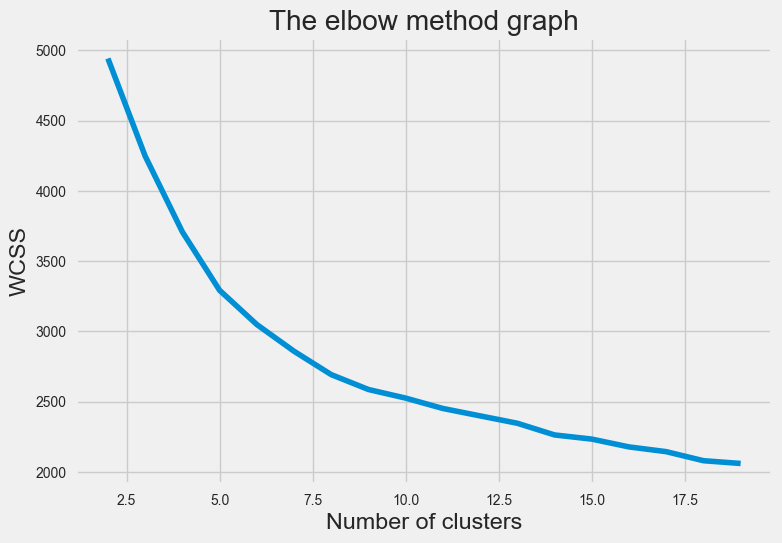

In [95]:

# find out the optimal number of clusters by within-cluster-sum of squared errors
wcss = []

for i in range(2,20):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(scaled_X)
    wcss.append(kmeans.inertia_)

plt.style.use("fivethirtyeight") 
plt.plot(range(2,20), wcss)
plt.title(f'The elbow method graph')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [42]:
# It looks like having 5 is reasonable but it is to small regarding our purpose of finding a similar player.

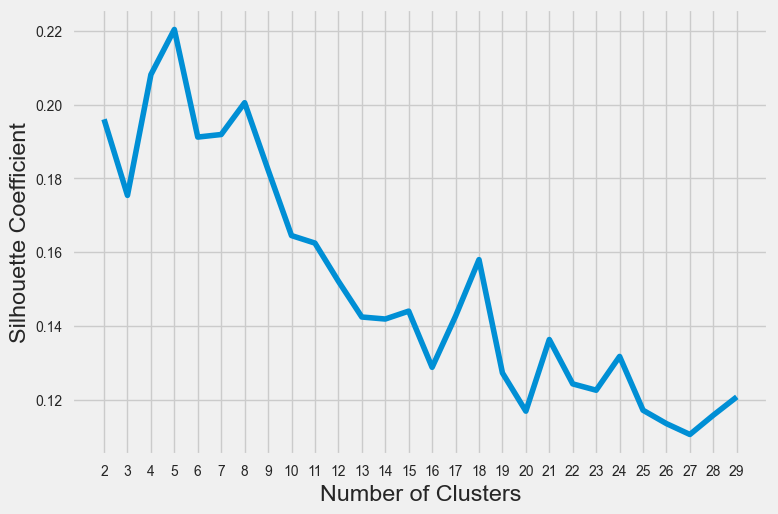

In [104]:
# To get silhouette_score
from sklearn.metrics import silhouette_score

silhouette_coefficients = []
kmeans_kwargs = {
    "init": "k-means++",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}
for k in range(2, 30):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_X)
    score = silhouette_score(scaled_X, kmeans.labels_)
    silhouette_coefficients.append(score)
    
plt.style.use("fivethirtyeight")
plt.plot(range(2, 30), silhouette_coefficients)
plt.xticks(range(2, 30))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

In [ ]:
# 5 is the best number of clusters for 284 players. 

/Users/1108232/PycharmProjects/Milestone2/venv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/1108232/PycharmProjects/Milestone2/venv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/1108232/PycharmProjects/Milestone2/venv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/1108232/PycharmProjects/Milestone2/venv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set th

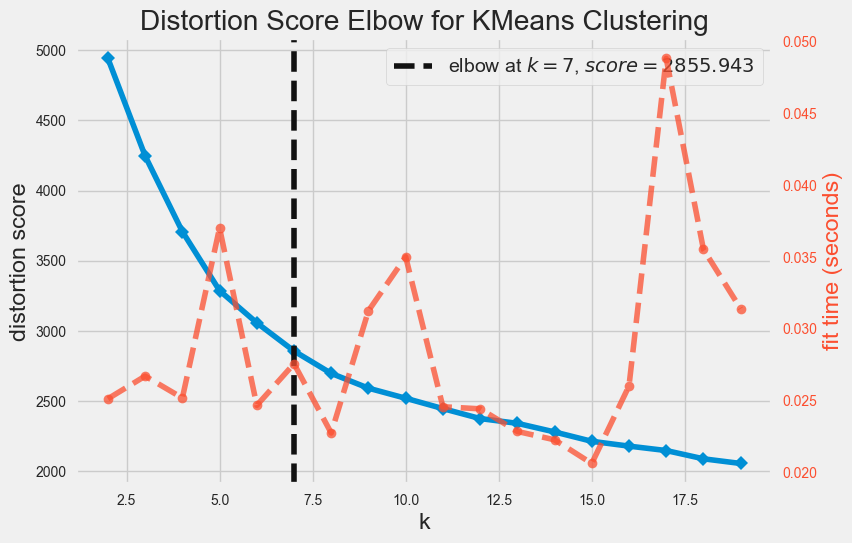

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [98]:
from yellowbrick.cluster import KElbowVisualizer

kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k=(2,20), timings=True)
visualizer.fit(scaled_X)
visualizer.show()

/Users/1108232/PycharmProjects/Milestone2/venv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/1108232/PycharmProjects/Milestone2/venv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/1108232/PycharmProjects/Milestone2/venv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/1108232/PycharmProjects/Milestone2/venv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set th

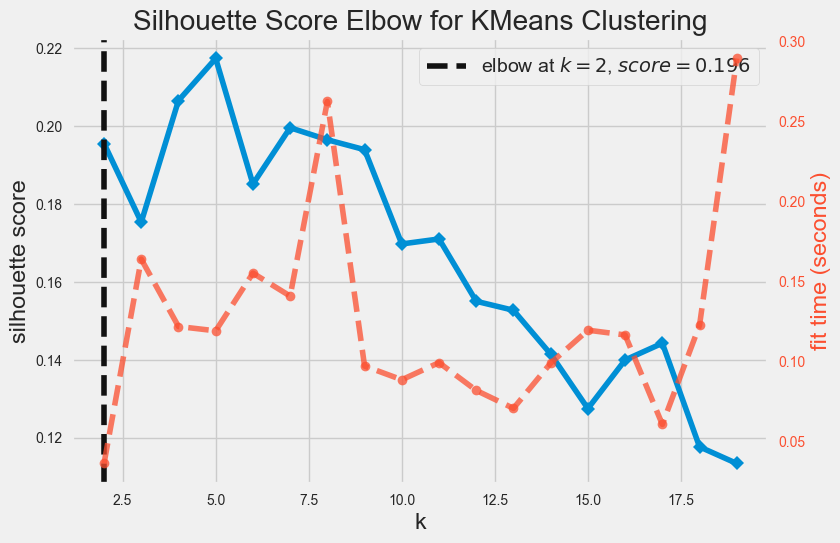

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [103]:
visualizer = KElbowVisualizer(kmeans, k=(2,20), metric='silhouette', timing=True)
visualizer.fit(scaled_X)
visualizer.show()

/Users/1108232/PycharmProjects/Milestone2/venv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/1108232/PycharmProjects/Milestone2/venv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/1108232/PycharmProjects/Milestone2/venv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/1108232/PycharmProjects/Milestone2/venv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set th

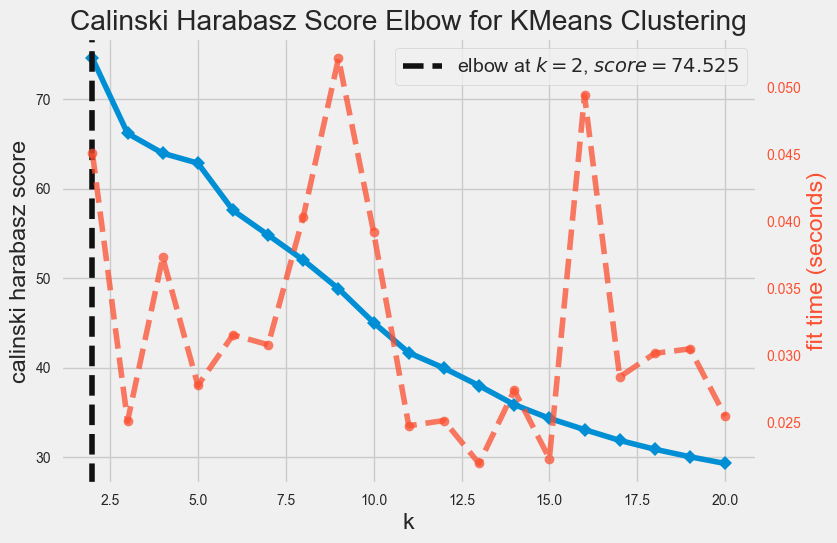

<Axes: title={'center': 'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [100]:
visualizer = KElbowVisualizer(kmeans, k=(20), metric='calinski_harabasz', timing=True)
visualizer.fit(scaled_X)
visualizer.show()

In [101]:
### visualize silhouette score
def visualize_silhouette(cluster_lists, X_features): 

    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math

    n_cols = len(cluster_lists)

    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)

 
    for ind, n_cluster in enumerate(cluster_lists):

        clusterer = KMeans(n_clusters=n_cluster, **kmeans_kwargs)
        cluster_labels = clusterer.fit_predict(X_features)

        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)

        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])

        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현. 
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()

            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10

        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

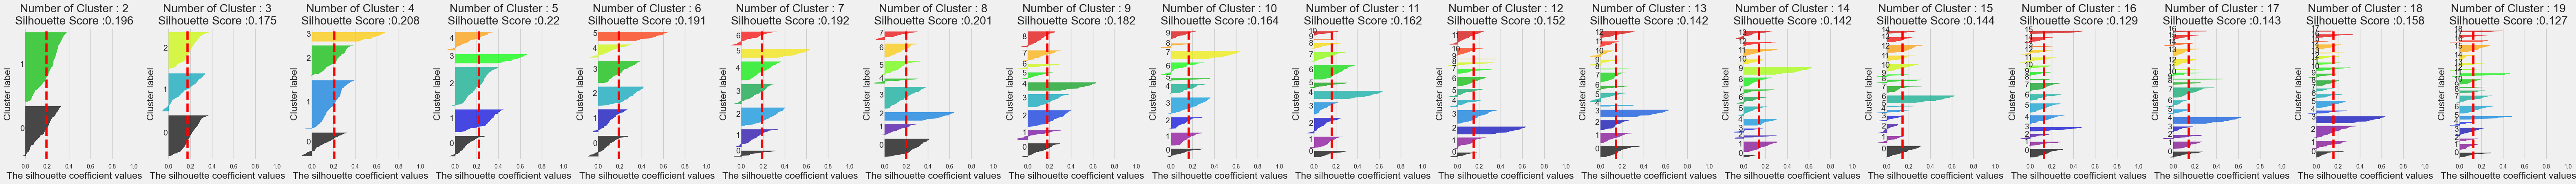

In [102]:
visualize_silhouette(range(2,20), scaled_X)

In [106]:
# except 5, 8 is the best one.
OPTIMAL_N_CLUSTERS = 8
kmeans = KMeans(n_clusters=OPTIMAL_N_CLUSTERS, init='k-means++', max_iter=300, n_init=10, random_state=42)

df['cluster'] = kmeans.fit_predict(scaled_X)

In [107]:
print(df['cluster'].value_counts())

cluster
3    61
0    51
5    40
6    39
1    31
2    24
7    24
4    14
Name: count, dtype: int64


In [110]:
# To evaluate, we convert the unsupervised clustering problem into a One-vs-all supervised classification problem.
for i in range(OPTIMAL_N_CLUSTERS):
    mapper = {c: 1 if i == c else 0 for c in range(OPTIMAL_N_CLUSTERS)}
    df[f'cluster {i}'] = df['cluster'].map(mapper)
df

,Name,Current Team,overall_ratings,avg_rating_10_games,goals_per_90min,yels,reds,shoots_per_game,pass_success,tackles,...,index,cluster,cluster 0,cluster 1,cluster 2,cluster 3,cluster 4,cluster 5,cluster 6,cluster 7
0,Aaron Hickey,Brentford,6.450000,6.276,0.000000,7.000000,0.000000,0.400000,84.700000,1.500000,...,0,3,0,0,0,1,0,0,0,0
1,Aaron Ramsdale,Arsenal,6.610000,6.553,0.000000,1.000000,0.000000,0.000000,56.433333,0.033333,...,1,2,0,0,1,0,0,0,0,0
2,Abdoulaye Doucouré,Everton,6.643333,6.701,0.131502,6.000000,0.333333,0.833333,81.700000,1.866667,...,2,5,0,0,0,0,0,1,0,0
3,Adam Forshaw,Leeds,6.260000,6.253,0.000000,2.500000,0.000000,0.300000,83.250000,1.650000,...,3,3,0,0,0,1,0,0,0,0
4,Adam Smith,Bournemouth,6.320000,6.371,0.000000,10.000000,0.000000,0.100000,75.100000,1.300000,...,4,3,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,Yoane Wissa,Brentford,6.515000,6.497,0.455392,1.000000,0.000000,1.000000,70.650000,0.400000,...,279,1,0,1,0,0,0,0,0,0
280,Youri Tielemans,Leicester,6.920000,6.518,0.161746,4.333333,0.000000,1.366667,82.333333,2.266667,...,280,5,0,0,0,0,0,1,0,0
281,Zanka,Brentford,6.400000,6.457,0.087041,1.500000,0.000000,0.250000,80.450000,1.100000,...,281,3,0,0,0,1,0,0,0,0
282,Álex Moreno,Aston Villa,6.710000,6.740,0.000000,3.000000,0.000000,0.700000,79.400000,1.200000,...,282,6,0,0,0,0,0,0,1,0


In [132]:
# train a classifier and get feature importances
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=42)
feature_importances = []
feature_columns = ['cluster','feature_name','feature_importance']
df_fi = pd.DataFrame(columns=feature_columns)
for i in range(OPTIMAL_N_CLUSTERS):
    clf.fit(df[features].values, df[f"cluster {i}"].values)
    
    # Index sort the most important features
    sorted_feature_weight_idxes = np.argsort(clf.feature_importances_)[::-1] # Reverse sort

    # Get the most important features names and weights
    most_important_features = np.take_along_axis(
        np.array(df.iloc[:, 2:24].columns.tolist()), 
        sorted_feature_weight_idxes, axis=0)
    most_important_weights = np.take_along_axis(
        np.array(clf.feature_importances_), 
        sorted_feature_weight_idxes, axis=0)
    

    # Show
    feature_importances.append(list(zip([i for j in range(len(most_important_weights))], most_important_features, most_important_weights)))
    df_fi_cluster = pd.DataFrame(columns=feature_columns, data=list(zip([i for j in range(len(most_important_weights))], most_important_features, most_important_weights)))
    df_fi = pd.concat([df_fi, df_fi_cluster])
    
feature_importances


[[(0, 'clear', 0.23676999586668873),
  (0, 'offsides_won', 0.21487321234076465),
  (0, 'total_pass', 0.11328310173735552),
  (0, 'turnover', 0.06691111650545942),
  (0, 'key_pass', 0.052974673758347496),
  (0, 'long_pass', 0.0527347477285208),
  (0, 'dispossessed', 0.03935405145762259),
  (0, 'shoots_per_game', 0.024995110417119947),
  (0, 'crosses', 0.022303784036508675),
  (0, 'drb', 0.02155779578571754),
  (0, 'drb_won', 0.020182059188457602),
  (0, 'tackles', 0.019689237250596382),
  (0, 'pass_success', 0.018042351870567647),
  (0, 'yels', 0.015797510812470255),
  (0, 'fouls', 0.015497608043622057),
  (0, 'overall_ratings', 0.01436250114115623),
  (0, 'goals_per_90min', 0.013574561251468893),
  (0, 'avg_rating_10_games', 0.011315188653902002),
  (0, 'blocks', 0.010308700022749662),
  (0, 'fouls_given', 0.008875905018271107),
  (0, 'offsides_given', 0.00442320773262224),
  (0, 'reds', 0.0021735793800105123)],
 [(1, 'total_pass', 0.1291979920907904),
  (1, 'offsides_given', 0.1052725

In [133]:
df_fi

,cluster,feature_name,feature_importance
0,0,clear,0.236770
1,0,offsides_won,0.214873
2,0,total_pass,0.113283
3,0,turnover,0.066911
4,0,key_pass,0.052975
...,...,...,...
17,7,crosses,0.011590
18,7,pass_success,0.010639
19,7,clear,0.010637
20,7,offsides_won,0.004970


In [138]:
# visualize feature importance
import altair as alt

alt.Chart(df_fi).mark_rect().encode(
    x='cluster:O',
    y='feature_name:N',
    color='feature_importance:Q'
).properties(
    width=800,
    height=800
).configure_axis(
    labelFontSize=20
)


alt.Chart(...)

In [201]:
final_chart = alt.vconcat()
row_chart = alt.hconcat()

for i in range(OPTIMAL_N_CLUSTERS):
    df_cluster = df_fi[df_fi['cluster'] == i]
    base = alt.Chart(df_cluster, title=f'Most important features for cluster {i}').encode(
        x='feature_importance:Q',
        y=alt.Y('feature_name:N').sort('-x'),
        text=alt.Text('feature_importance:Q', format=".3"),
        color=alt.condition(
            alt.datum.feature_importance > 0.1,
            alt.value("orange"),
            alt.value('skyblue')
        )
    )

    bar = base.mark_bar().properties(
        width=300,
        height=800,
    )

    text = base.mark_text(align='left', dx=2)

    chart = (bar + text)
    if i == 0 :
        row_chart = chart
    elif i == 4:
        final_chart = alt.vconcat(final_chart, row_chart) 
        row_chart = chart
    else :
        row_chart = alt.hconcat(row_chart, chart)

final_chart = alt.vconcat(final_chart, row_chart)
    
final_chart.configure_title(
        fontSize=24,
    ).configure_axis(
        labelFontSize=20,
        titleFontSize=24,
    ).configure_text(
        fontSize=20
    )

alt.VConcatChart(...)

In [172]:
# to visualize PCA and feature correlations
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import cnames
from itertools import cycle
from bokeh.plotting import output_notebook, output_file, figure, show, ColumnDataSource
from bokeh.models import HoverTool
import warnings
warnings.filterwarnings(action='ignore')
output_notebook()
%matplotlib inline


Loading BokehJS ...

In [32]:
from pca_analyzer import *


*--- PCA Report ---*

X mean:		-0.000
X variance:	1.000
...Assuming data is properly scaled...

 -- Summary --
You can reduce from 25 to 15 dimensions while retaining 95% of variance.
2 principal components explain 46.70% of variance.
3 principal components explain 57.80% of variance.
X*X_pca: (25, 284) * (284, 25) = (25, 25)


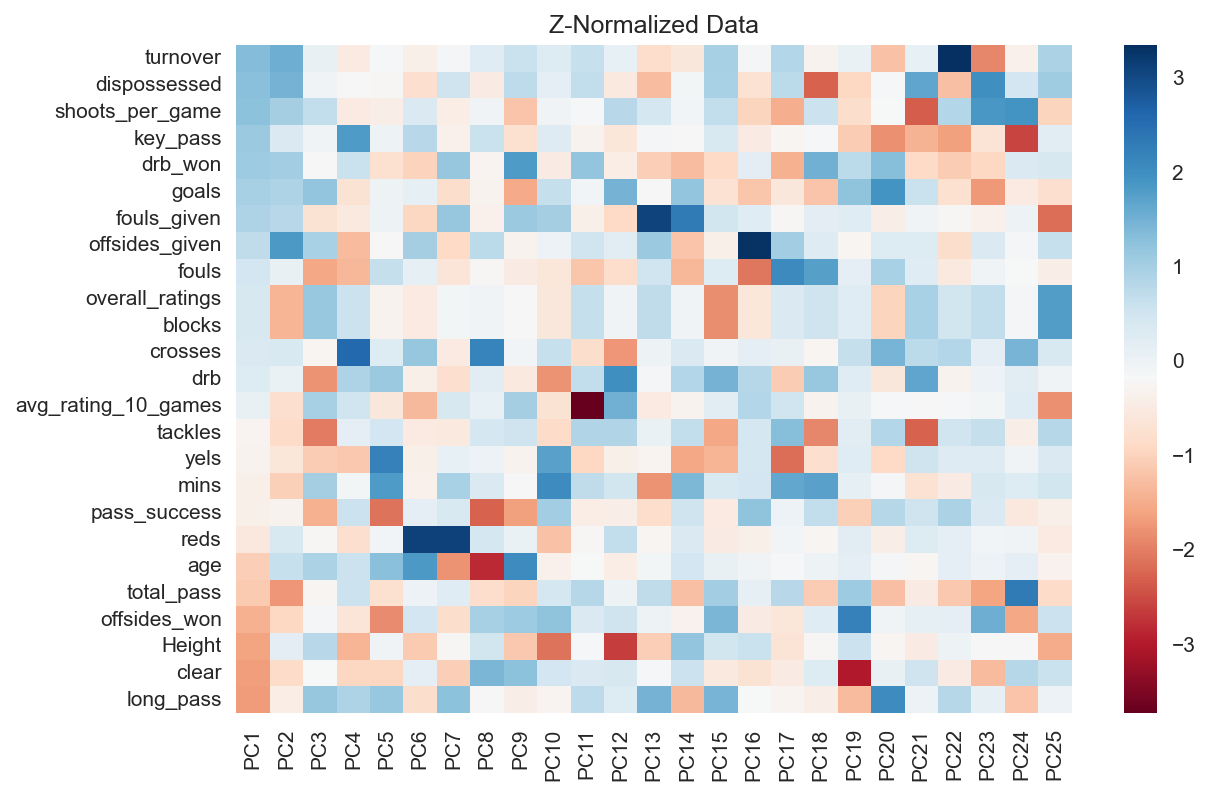

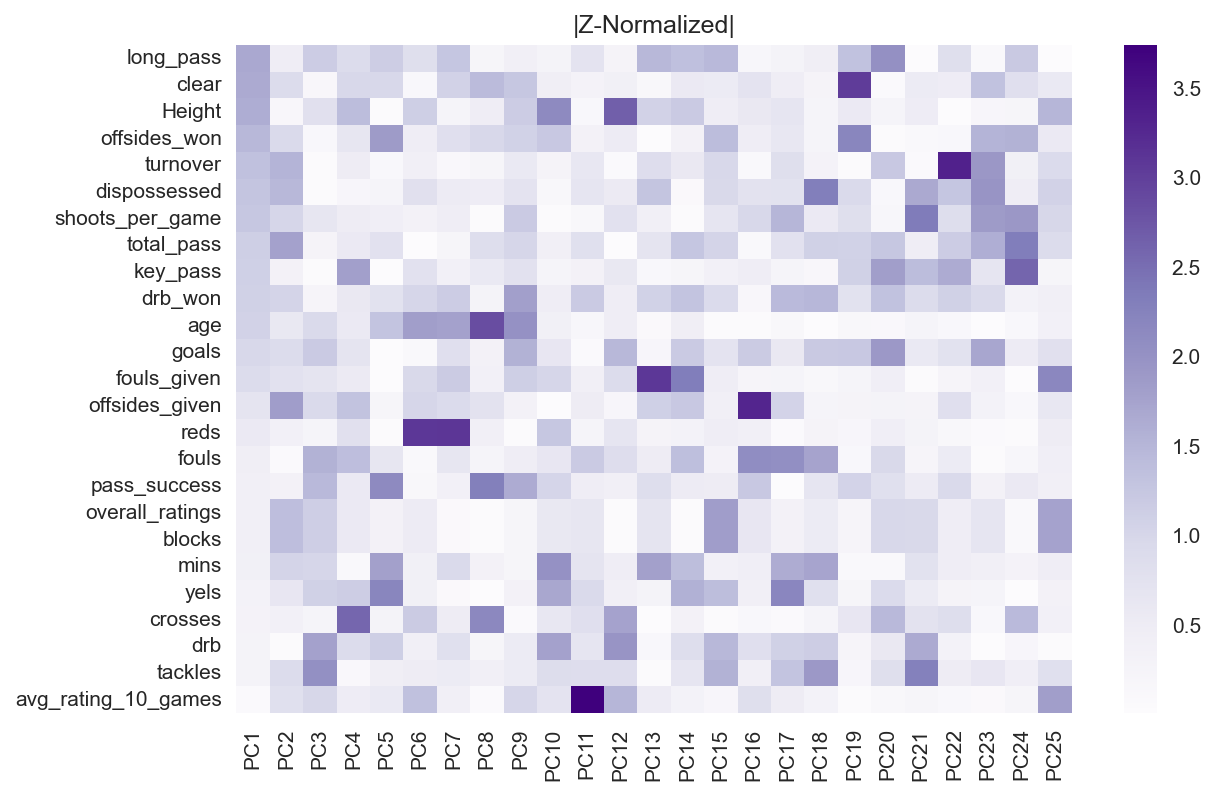

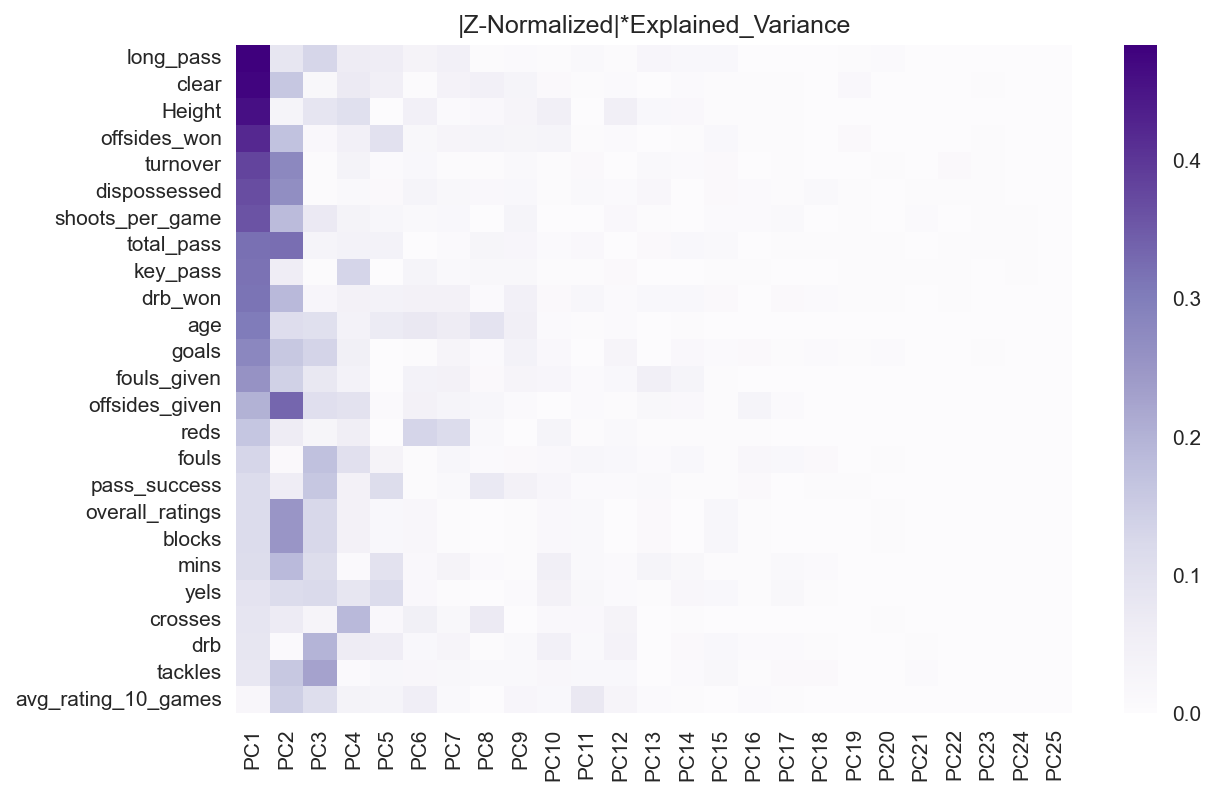

        score_             feature_
rank                               
1     1.041749            long_pass
2     0.987212                clear
3     0.965566         offsides_won
4     0.962560       offsides_given
5     0.958231               Height
6     0.948883                  age
7     0.928618           total_pass
8     0.891106              drb_won
9     0.870236         dispossessed
10    0.846724             turnover
11    0.839251                goals
12    0.830579      shoots_per_game
13    0.798233          fouls_given
14    0.751952                 mins
15    0.735671         pass_success
16    0.712527                 yels
17    0.703835              tackles
18    0.677648      overall_ratings
19    0.677648               blocks
20    0.675407             key_pass
21    0.655003                 reds
22    0.652142                  drb
23    0.647361                fouls
24    0.624494              crosses
25    0.602406  avg_rating_10_games


(           variance_cumulative      variance
 dimension                                   
 1                     0.285565  2.855654e-01
 2                     0.467078  1.815125e-01
 3                     0.578097  1.110187e-01
 4                     0.650994  7.289729e-02
 5                     0.703987  5.299331e-02
 6                     0.746191  4.220332e-02
 7                     0.783268  3.707796e-02
 8                     0.815903  3.263445e-02
 9                     0.841794  2.589062e-02
 10                    0.867407  2.561338e-02
 11                    0.887838  2.043143e-02
 12                    0.907798  1.995931e-02
 13                    0.925147  1.734973e-02
 14                    0.938752  1.360492e-02
 15                    0.951566  1.281402e-02
 16                    0.961782  1.021595e-02
 17                    0.970872  9.089838e-03
 18                    0.977396  6.523383e-03
 19                    0.983001  5.605834e-03
 20                    0.987007  4

In [33]:
pca_full_report(X=scaled_X, features_=features)


In [35]:
# Ratings, which are very important in reality, seem to be underestimated in PCA
# while Age and Height are overestimated.
# Re-run PCA without "Height" and "age"
# Choose 8 principal component
features = ['overall_ratings', 'avg_rating_10_games', 'mins', 'goals', 'yels', 'reds',
       'shoots_per_game', 'pass_success', 'tackles',
       'fouls', 'offsides_won', 'clear', 'drb', 'blocks', 'key_pass',
       'drb_won', 'fouls_given', 'offsides_given', 'dispossessed', 'turnover',
       'total_pass', 'crosses', 'long_pass']

X = np.array(df[features])
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)
scaled_X


from sklearn.decomposition import PCA 
pca_players = PCA(n_components=8)
principalComponents_players = pca_players.fit_transform(scaled_X)
pca_columns =  ['PCA 1', 'PCA 2', 'PCA 3', 'PCA 4', 'PCA 5', 'PCA 6', 'PCA 7', 'PCA 8']

pca_df = pd.DataFrame(data = principalComponents_players, columns = pca_columns)
pca_df.reset_index(inplace=True)

In [36]:
final_df = pd.merge(df, pca_df, on='index')
final_df

,Name,Current Team,overall_ratings,avg_rating_10_games,mins,goals,yels,reds,shoots_per_game,pass_success,...,age,index,PCA 1,PCA 2,PCA 3,PCA 4,PCA 5,PCA 6,PCA 7,PCA 8
0,Aaron Hickey,Brentford,6.450000,6.276,1861.000000,0.000000,7.000000,0.000000,0.400000,84.700000,...,20.0,0,-1.149214,0.213238,-2.081091,-0.582364,0.635510,-0.578033,-0.740320,-0.151944
1,Aaron Ramsdale,Arsenal,6.610000,6.553,3270.000000,0.000000,1.000000,0.000000,0.000000,56.433333,...,25.0,1,-3.921249,1.142563,3.626632,0.468050,2.335048,-0.097415,-0.466236,0.468987
2,Abdoulaye Doucouré,Everton,6.643333,6.701,2143.000000,2.666667,6.000000,0.333333,0.833333,81.700000,...,30.0,2,0.563113,-0.705680,-1.456909,-0.512361,0.862276,0.649231,-0.482950,-0.534252
3,Adam Forshaw,Leeds,6.260000,6.253,959.000000,0.000000,2.500000,0.000000,0.300000,83.250000,...,31.0,3,-1.541740,1.643881,-2.532807,0.800955,0.164439,-0.139088,0.021628,-0.602665
4,Adam Smith,Bournemouth,6.320000,6.371,2867.000000,0.000000,10.000000,0.000000,0.100000,75.100000,...,32.0,4,-1.952155,-0.290102,-1.941359,-0.454380,2.849619,0.177294,0.764440,-0.087156
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,Yoane Wissa,Brentford,6.515000,6.497,1393.500000,7.000000,1.000000,0.000000,1.000000,70.650000,...,26.0,279,0.114899,3.181199,1.329448,-0.797495,-0.234975,-0.115265,0.637575,-0.419515
280,Youri Tielemans,Leicester,6.920000,6.518,2751.000000,5.000000,4.333333,0.000000,1.366667,82.333333,...,26.0,280,2.192587,-2.503686,-1.155290,1.205258,1.274290,-0.365510,-0.036652,-1.110495
281,Zanka,Brentford,6.400000,6.457,762.500000,0.500000,1.500000,0.000000,0.250000,80.450000,...,33.0,281,-2.833495,1.289701,-0.904727,0.183037,-0.732015,-0.087175,0.683375,-0.548998
282,Álex Moreno,Aston Villa,6.710000,6.740,1336.000000,0.000000,3.000000,0.000000,0.700000,79.400000,...,29.0,282,1.227127,-0.519175,-1.200931,1.599953,-0.745024,0.000579,0.882570,1.217550


In [48]:
# To cluster, we use 10 columns (overall_ratings, avg_rating_10_games, pca 1~8)
features = ['PCA 1','PCA 2','PCA 3','PCA 4','PCA 5','PCA 6','PCA 7','PCA 8']
X = np.array(final_df[features])

scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)
scaled_X

array([[-4.37999569e-01,  1.00854415e-01, -1.28466403e+00, ...,
        -5.79876962e-01, -7.83761421e-01, -1.82106612e-01],
       [-1.49450457e+00,  5.40393256e-01,  2.23873123e+00, ...,
        -9.77258673e-02, -4.93593957e-01,  5.62085703e-01],
       [ 2.14619202e-01, -3.33762453e-01, -8.99354205e-01, ...,
         6.51302562e-01, -5.11288825e-01, -6.40306101e-01],
       ...,
       [-1.07992930e+00,  6.09984655e-01, -5.58490445e-01, ...,
        -8.74527700e-02,  7.23474353e-01, -6.57980077e-01],
       [ 4.67694740e-01, -2.45551902e-01, -7.41338208e-01, ...,
         5.80618532e-04,  9.34358253e-01,  1.45924608e+00],
       [-1.48155686e+00,  7.13768465e-01,  1.11683468e+00, ...,
        -1.09990547e-01, -1.04912671e+00, -1.40644990e+00]])

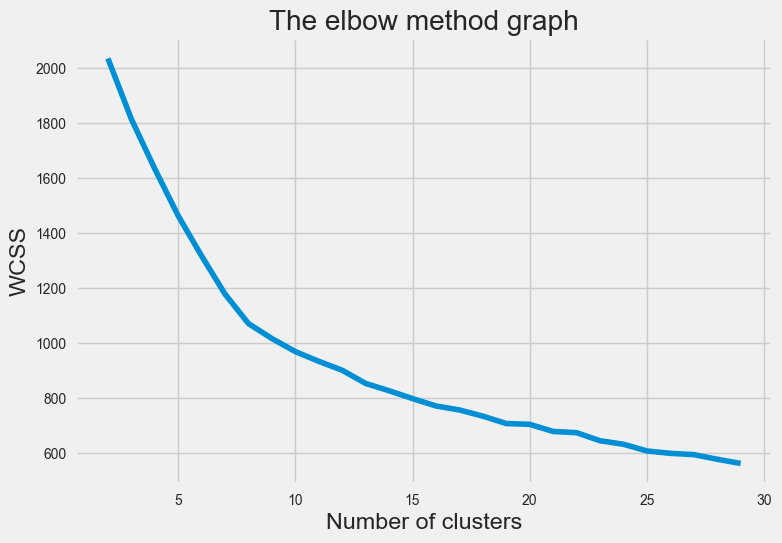

In [49]:
# find out the optimal number of clusters by within-cluster-sum of squared errors
wcss = []

for i in range(2,30):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(scaled_X)
    wcss.append(kmeans.inertia_)

plt.style.use("fivethirtyeight") 
plt.plot(range(2,30), wcss)
plt.title(f'The elbow method graph')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

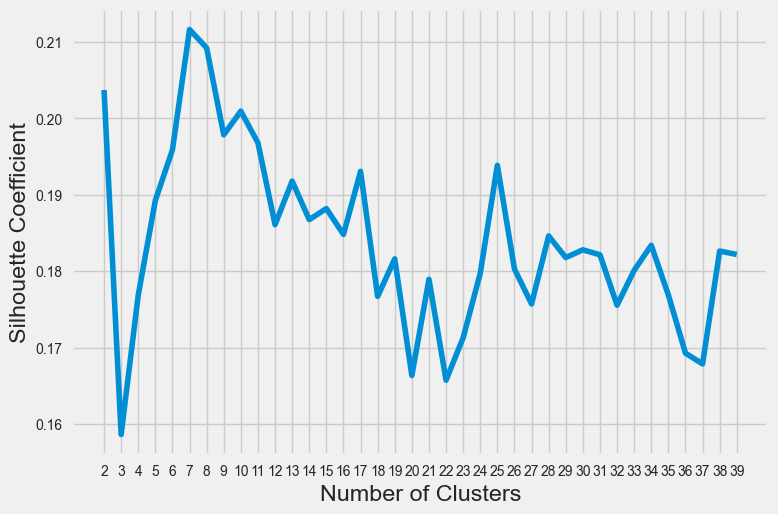

In [50]:
silhouette_coefficients = []
kmeans_kwargs = {
    "init": "k-means++",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}
for k in range(2, 40):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_X)
    score = silhouette_score(scaled_X, kmeans.labels_)
    silhouette_coefficients.append(score)
    
plt.style.use("fivethirtyeight")
plt.plot(range(2, 40), silhouette_coefficients)
plt.xticks(range(2, 40))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

/Users/1108232/PycharmProjects/Milestone2/venv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/1108232/PycharmProjects/Milestone2/venv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/1108232/PycharmProjects/Milestone2/venv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/1108232/PycharmProjects/Milestone2/venv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set th

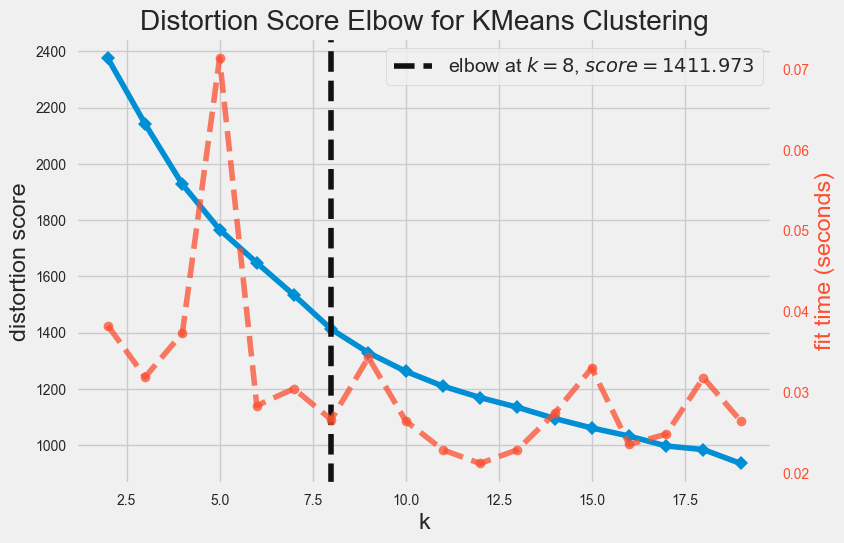

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [44]:
from yellowbrick.cluster import KElbowVisualizer

kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k=(2,20), timings=True)
visualizer.fit(scaled_X)
visualizer.show()

In [51]:
OPTIMAL_N_CLUSTERS = 7

kmeans = KMeans(n_clusters=OPTIMAL_N_CLUSTERS, init='k-means++', max_iter=300, n_init=10, random_state=42)

final_df['cluster'] = kmeans.fit_predict(scaled_X)


In [52]:
# visualize using altair
import altair as alt

alt.Chart(final_df).mark_circle(size=60).encode(
    x='PCA 1',
    y='PCA 2',
    color='cluster:N',
    tooltip=['Name', 'cluster', 'Current Team', 'PCA 1', 'PCA 2']
).properties(
    width=800,
    height=800
).interactive()

alt.Chart(...)

In [87]:
# export csv file
final_df.to_csv(f'../datasets/labeled_after_clustering/kmeans/player_stats_with_label.csv')

In [93]:
# just to check the columns
final_df.columns


Index(['Name', 'Current Team', 'overall_ratings', 'avg_rating_10_games',
       'mins', 'goals', 'yels', 'reds', 'shoots_per_game', 'pass_success',
       'tackles', 'fouls', 'offsides_won', 'clear', 'drb', 'blocks',
       'key_pass', 'drb_won', 'fouls_given', 'offsides_given', 'dispossessed',
       'turnover', 'total_pass', 'crosses', 'long_pass', 'Height', 'age',
       'index', 'cluster', 'PCA 1', 'PCA 2'],
      dtype='object')

In [95]:
final_df

,Name,Current Team,overall_ratings,avg_rating_10_games,mins,goals,yels,reds,shoots_per_game,pass_success,...,turnover,total_pass,crosses,long_pass,Height,age,index,cluster,PCA 1,PCA 2
0,Aaron Hickey,Brentford,6.450000,6.276,1861.000000,0.000000,7.000000,0.000000,0.400000,84.700000,...,0.600000,28.4,0.200000,1.100000,178.0,20.0,0,0,-0.803671,0.526813
1,Aaron Ramsdale,Arsenal,6.610000,6.553,3270.000000,0.000000,1.000000,0.000000,0.000000,56.433333,...,0.033333,27.0,0.000000,5.233333,188.0,25.0,1,5,-3.979549,1.201958
2,Abdoulaye Doucouré,Everton,6.643333,6.701,2143.000000,2.666667,6.000000,0.333333,0.833333,81.700000,...,1.200000,34.6,0.033333,0.800000,184.0,30.0,2,0,0.437709,-0.766215
3,Adam Forshaw,Leeds,6.260000,6.253,959.000000,0.000000,2.500000,0.000000,0.300000,83.250000,...,0.800000,26.0,0.150000,1.600000,174.0,31.0,3,2,-1.239768,1.916042
4,Adam Smith,Bournemouth,6.320000,6.371,2867.000000,0.000000,10.000000,0.000000,0.100000,75.100000,...,0.600000,25.8,0.500000,1.600000,180.0,32.0,4,0,-1.930282,-0.127259
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,Yoane Wissa,Brentford,6.515000,6.497,1393.500000,7.000000,1.000000,0.000000,1.000000,70.650000,...,1.100000,8.8,0.000000,0.200000,176.0,26.0,279,2,0.384739,3.197409
280,Youri Tielemans,Leicester,6.920000,6.518,2751.000000,5.000000,4.333333,0.000000,1.366667,82.333333,...,1.200000,55.9,0.466667,2.500000,176.0,26.0,280,0,2.274136,-2.447240
281,Zanka,Brentford,6.400000,6.457,762.500000,0.500000,1.500000,0.000000,0.250000,80.450000,...,0.100000,28.7,0.150000,1.300000,191.0,33.0,281,2,-3.061119,1.267395
282,Álex Moreno,Aston Villa,6.710000,6.740,1336.000000,0.000000,3.000000,0.000000,0.700000,79.400000,...,2.000000,30.5,0.800000,0.500000,179.0,29.0,282,0,1.277538,-0.495402


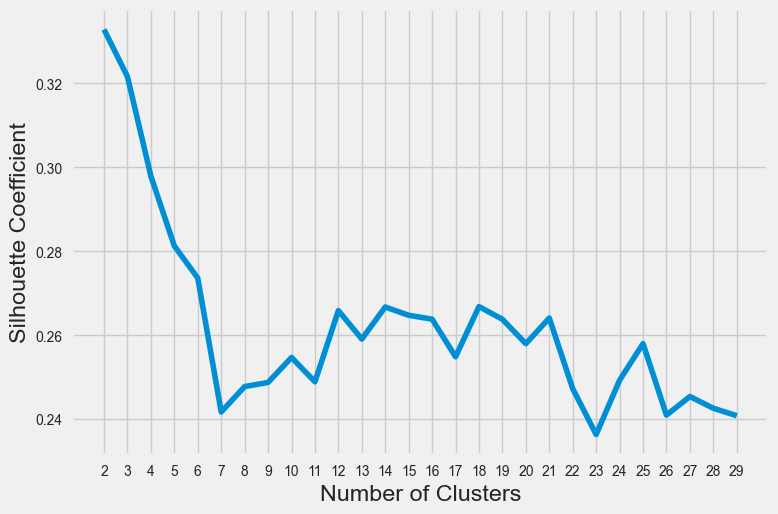

In [99]:
# different features
features_tuned = ['overall_ratings', 'avg_rating_10_games', 'PCA 1', 'PCA 2']

X = np.array(final_df[features_tuned])

scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)
scaled_X

from sklearn.metrics import silhouette_score

silhouette_coefficients = []
kmeans_kwargs = {
    "init": "k-means++",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}
for k in range(2, 30):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_X)
    score = silhouette_score(scaled_X, kmeans.labels_)
    silhouette_coefficients.append(score)
    
plt.style.use("fivethirtyeight")
plt.plot(range(2, 30), silhouette_coefficients)
plt.xticks(range(2, 30))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

/Users/1108232/PycharmProjects/Milestone2/venv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/1108232/PycharmProjects/Milestone2/venv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/1108232/PycharmProjects/Milestone2/venv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/1108232/PycharmProjects/Milestone2/venv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set th

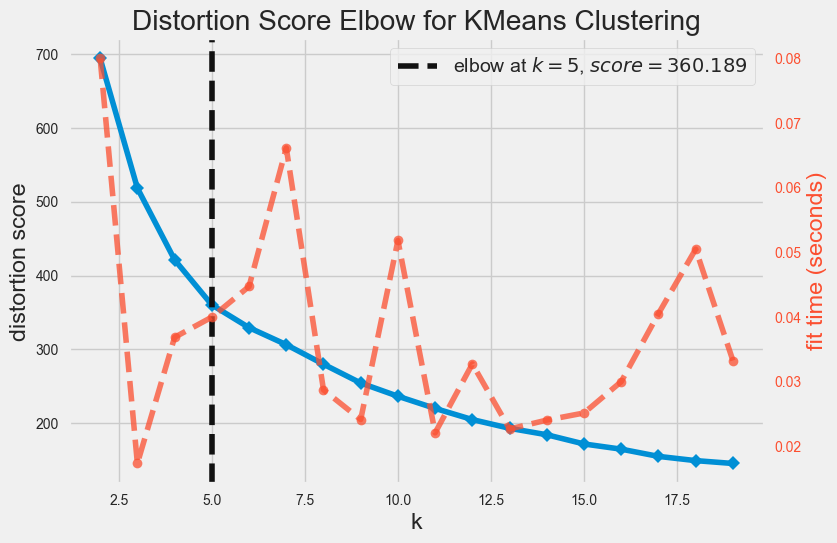

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [97]:
kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k=(2,20), timings=True)
visualizer.fit(scaled_X)
visualizer.show()

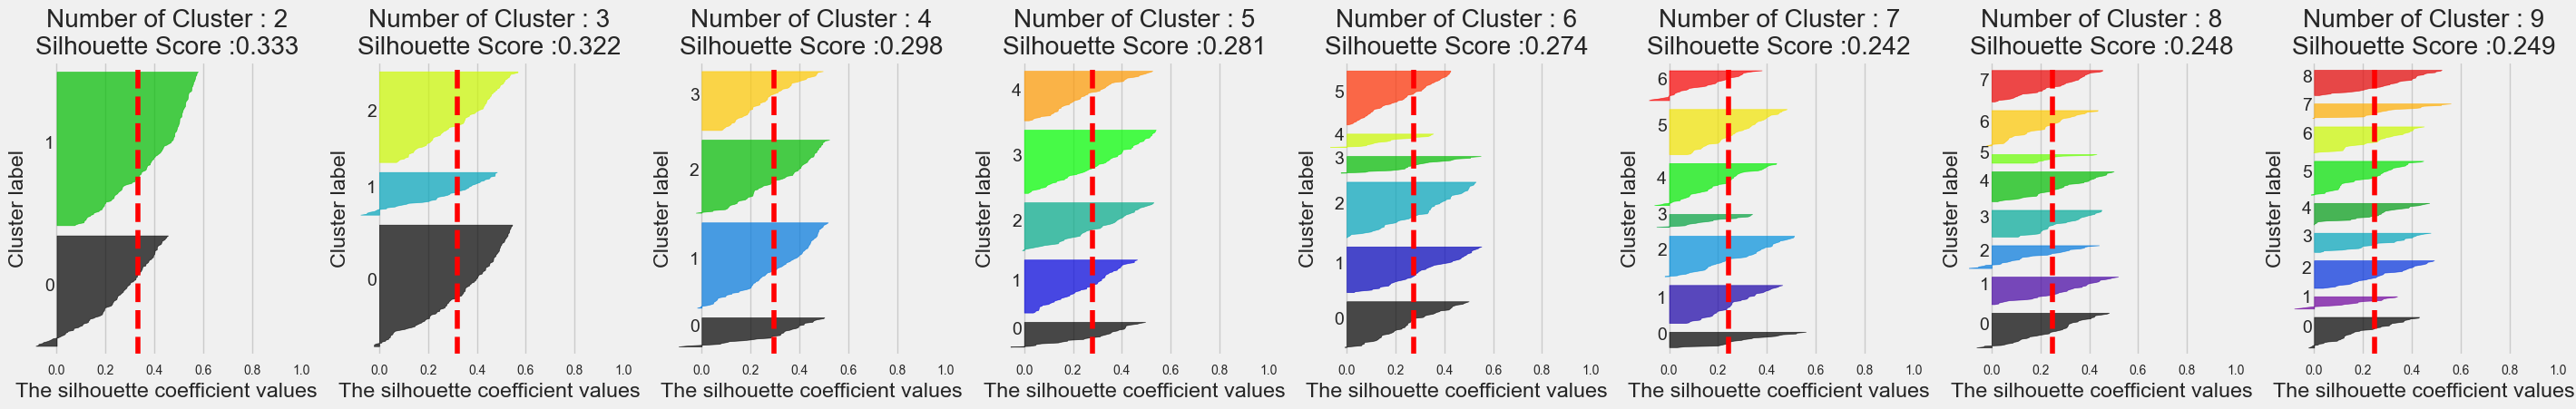

In [98]:
visualize_silhouette(range(2,10), scaled_X)

In [100]:
OPTIMAL_N_CLUSTERS = 18

kmeans = KMeans(n_clusters=OPTIMAL_N_CLUSTERS, init='k-means++', max_iter=300, n_init=10, random_state=42)

final_df['cluster'] = kmeans.fit_predict(scaled_X)

In [102]:
# import altair as alt

alt.Chart(final_df).mark_circle(size=60).encode(
    x='PCA 1',
    y='PCA 2',
    color='cluster:N',
    tooltip=['Name', 'cluster', 'Current Team', 'overall_ratings', 'PCA 1', 'PCA 2']
).properties(
    width=800,
    height=800
).interactive()

alt.Chart(...)

In [115]:
evr = pca_players.explained_variance_ratio_

In [116]:
cumsum = np.cumsum(evr)


In [117]:
cumsum

array([0.60521732, 0.85554617, 0.96481263, 1.        ])